# 경기종합지수[Composite Economic Indexes]

## preprocessing

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
import seaborn as sns

In [163]:
df_cei = pd.read_csv('data/CEI_pre.csv') #data_load

In [164]:
df_cei.head()

,지수별,1970. 01 목,1970. 02 일,1970. 03 일,1970. 04 수,1970. 05 금,1970. 06 월,1970. 07 수,1970. 08 토,1970. 09 화,...,2020. 06 월,2020. 07 수,2020. 08 토,2020. 09 화,2020. 10 목,2020. 11 일,2020. 12 화,2021. 01 금,2021. 02 월,2021. 03 월
0,선행종합지수(2015=100),4.4,4.4,4.4,4.5,4.5,4.5,4.6,4.6,4.6,...,118.3,119.0,120.0,120.9,121.6,122.6,123.4,124.1,124.8,125.3
1,선행종합지수 전월비(%),0.0,0.0,0.0,2.3,0.0,0.0,2.2,0.0,0.0,...,0.6,0.6,0.8,0.8,0.6,0.8,0.7,0.6,0.6,0.4
2,선행지수 순환변동치,101.1,101.0,100.8,100.7,100.5,100.3,100.2,100.0,99.8,...,99.7,100.0,100.6,101.0,101.4,102.0,102.4,102.7,102.9,103.1
3,〔순환변동치 전월차〕(p),0.0,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.2,-0.2,...,0.4,0.3,0.6,0.4,0.4,0.6,0.4,0.3,0.2,0.2
4,선행지수 전년동월비(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.2,3.6,4.1,4.6,5.0,5.6,5.9,6.2,6.3,6.3


In [165]:
df_cei_t = df_cei.T #transpose
df_cei_t

,0,1,2,3,4,5,6,7,8,9,10,11
지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
1970. 01 목,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970. 02 일,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970. 03 일,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970. 04 수,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020. 11 일,122.6,0.8,102,0.6,5.6,0.6,113.8,0.7,99.5,0.5,117.6,0.2
2020. 12 화,123.4,0.7,102.4,0.4,5.9,0.3,114,0.2,99.7,0.2,117.9,0.3
2021. 01 금,124.1,0.6,102.7,0.3,6.2,0.3,113.9,-0.1,99.4,-0.3,118.2,0.3
2021. 02 월,124.8,0.6,102.9,0.2,6.3,0.1,114.3,0.4,99.7,0.3,118.6,0.3


In [166]:
df_cei_t.columns = df_cei_t.iloc[0] #1행을 column으로 설정
df_cei_t.drop('지수별', inplace=True) #1행 삭제
df_cei_t

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
1970. 01 목,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970. 02 일,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970. 03 일,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970. 04 수,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
1970. 05 금,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020. 11 일,122.6,0.8,102,0.6,5.6,0.6,113.8,0.7,99.5,0.5,117.6,0.2
2020. 12 화,123.4,0.7,102.4,0.4,5.9,0.3,114,0.2,99.7,0.2,117.9,0.3
2021. 01 금,124.1,0.6,102.7,0.3,6.2,0.3,113.9,-0.1,99.4,-0.3,118.2,0.3
2021. 02 월,124.8,0.6,102.9,0.2,6.3,0.1,114.3,0.4,99.7,0.3,118.6,0.3


### index로 날짜를 설정

In [167]:
cei_t_idx_date = [x[:8] for x in df_cei_t.index] #날짜의 앞부분 8개만
cei_t_idx_date[:10]

['1970. 01',
 '1970. 02',
 '1970. 03',
 '1970. 04',
 '1970. 05',
 '1970. 06',
 '1970. 07',
 '1970. 08',
 '1970. 09',
 '1970. 10']

In [168]:
df_cei_t['date'] = cei_t_idx_date
df_cei_t.head()

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%),date
1970. 01 목,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0,1970. 01
1970. 02 일,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4,1970. 02
1970. 03 일,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4,1970. 03
1970. 04 수,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0,1970. 04
1970. 05 금,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3,1970. 05


In [169]:
df_cei_t.set_index('date', drop=True, inplace=True)
df_cei_t.head()

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
date,,,,,,,,,,,,
1970. 01,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970. 02,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970. 03,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970. 04,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
1970. 05,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3


In [170]:
df_cei_t.index = pd.to_datetime(df_cei_t.index)
df_cei_t.head()

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
date,,,,,,,,,,,,
1970-01-01,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970-02-01,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970-03-01,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970-04-01,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
1970-05-01,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3


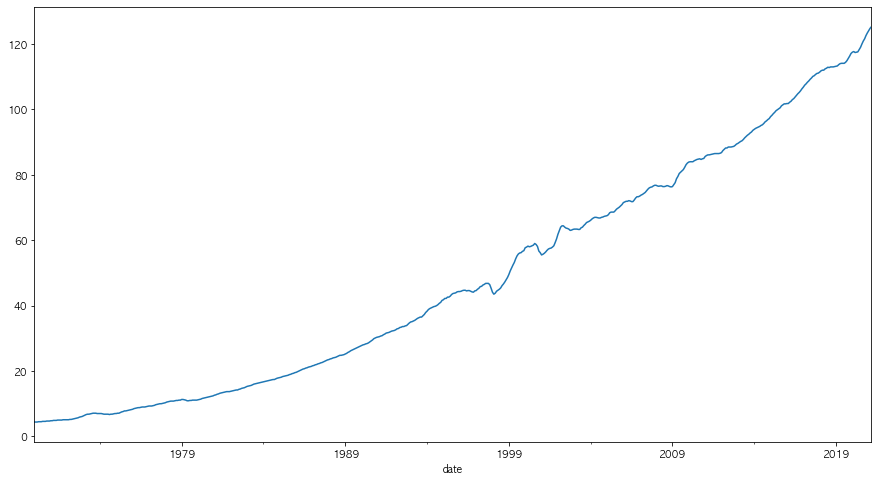

In [171]:
plt.figure(figsize=(15,8))
df_cei_t['선행종합지수(2015=100)'].plot()
plt.show()

In [172]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

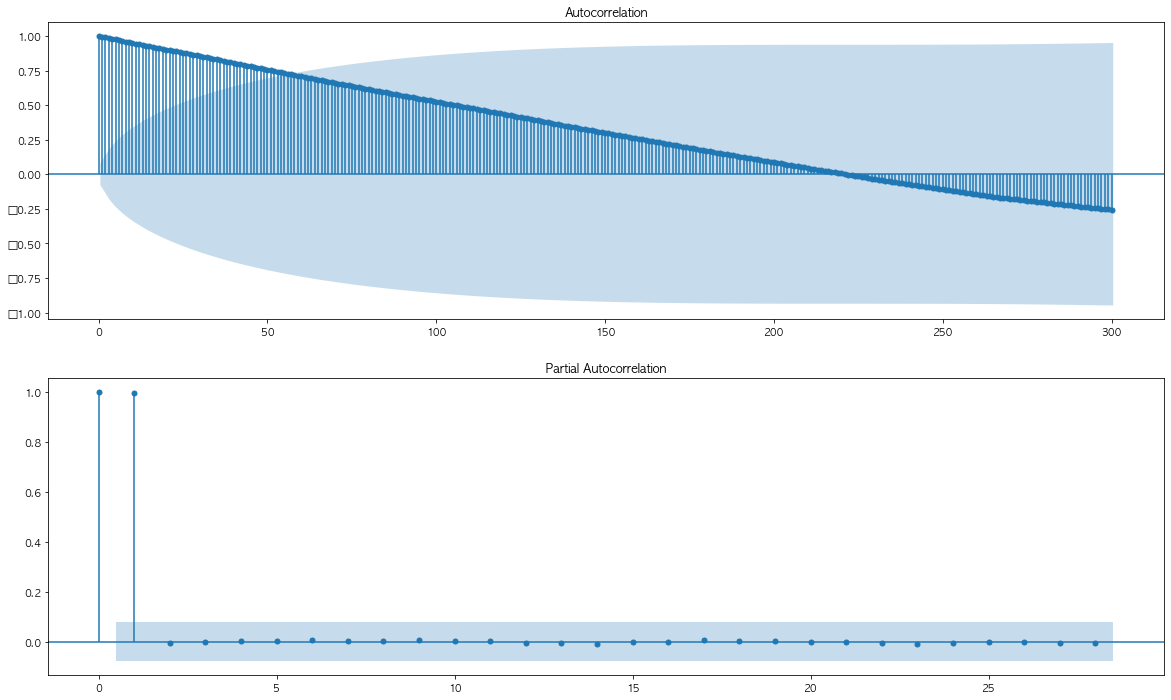

In [173]:
fig, ax = plt.subplots(2, 1, figsize=(20,12))

plot_acf(df_cei_t['선행종합지수(2015=100)'], lags=300, ax=ax[0])
plot_pacf(df_cei_t['선행종합지수(2015=100)'], ax=ax[1])
plt.show()

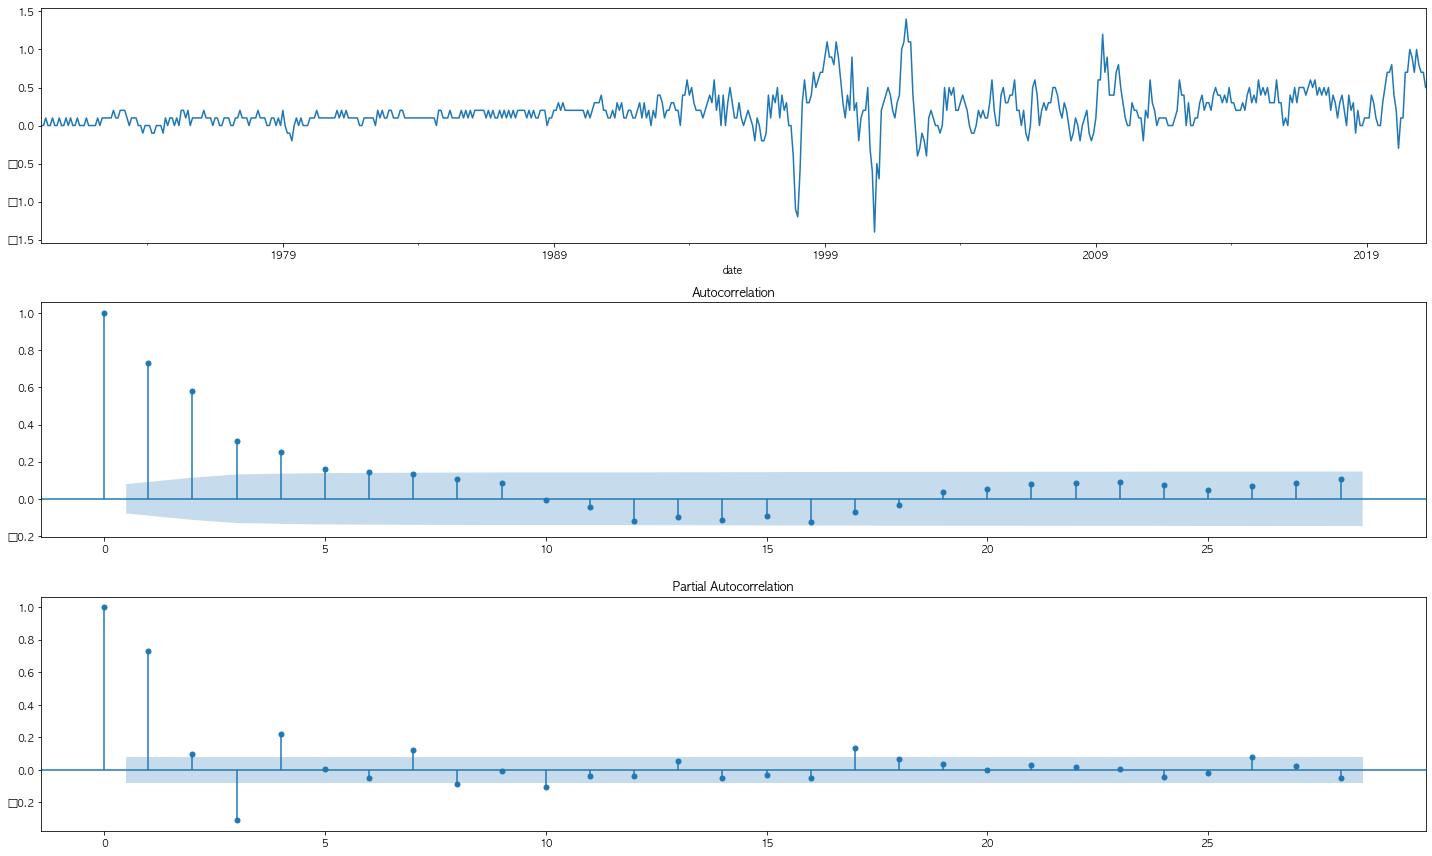

In [174]:
fig, ax = plt.subplots(3, 1, figsize=(20,12))

diff_1=df_cei_t['선행종합지수(2015=100)'].diff(periods=1).iloc[1:]
diff_1.plot(ax=ax[0])
plot_acf(diff_1, ax=ax[1])
plot_pacf(diff_1, ax=ax[2])

plt.tight_layout()
plt.show()

In [240]:
df_train=df_cei_t.iloc[:-5]

In [242]:
# ARIMA 모델을 학습
model = ARIMA(df_train['선행종합지수(2015=100)'].values, order=(0,1,1))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  609
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  69.867
Method:                       css-mle   S.D. of innovations              0.216
Date:                Wed, 12 May 2021   AIC                           -133.734
Time:                        22:10:08   BIC                           -120.498
Sample:                             1   HQIC                          -128.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1926      0.013     15.080      0.000       0.168       0.218
ma.L1.D.y      0.4621      0.025     18.672      0.000       0.414       0.511
                                    Roots           

In [243]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_train['선행종합지수(2015=100)'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-262.784, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-290.385, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-284.236, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-308.217, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-389.015, Time=0.11 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-393.184, Time=0.13 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-392.072, Time=0.17 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-445.911, Time=0.72 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-400.070, Time=0.16 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=-443.980, Time=0.56 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-443.952, Time=0.57 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-438.152, Time=0.75 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=-455.404, Time=0.80 sec
 ARIMA(5,2,3)(0,0,0)[0]             : 

In [244]:
# ARIMA 모델을 학습
model = ARIMA(df_train['선행종합지수(2015=100)'].values, order=(5,2,3))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/Users/johanjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  608
Model:                 ARIMA(5, 2, 3)   Log Likelihood                 241.523
Method:                       css-mle   S.D. of innovations              0.162
Date:                Wed, 12 May 2021   AIC                           -463.045
Time:                        22:10:36   BIC                           -418.943
Sample:                             2   HQIC                          -445.887
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.126      0.000       0.000       0.001
ar.L1.D2.y    -0.4384      0.121     -3.624      0.000      -0.675      -0.201
ar.L2.D2.y     0.8142      0.065     12.574      0.0

In [250]:
# ARIMA 모델을 학습
model2 = ARIMA(df_train['선행종합지수(2015=100)'].values, order=(0,1,1))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit2 = model2.fit(trend='c', full_output=True, disp=True)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  609
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  69.867
Method:                       css-mle   S.D. of innovations              0.216
Date:                Wed, 12 May 2021   AIC                           -133.734
Time:                        22:12:01   BIC                           -120.498
Sample:                             1   HQIC                          -128.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1926      0.013     15.080      0.000       0.168       0.218
ma.L1.D.y      0.4621      0.025     18.672      0.000       0.414       0.511
                                    Roots           

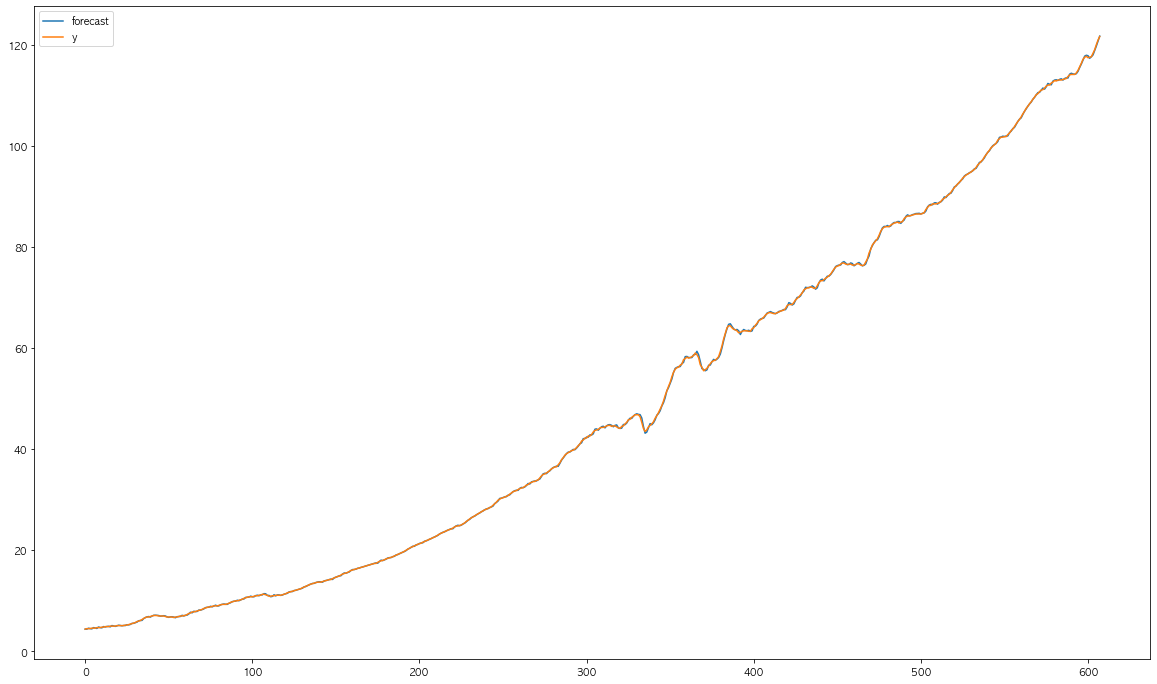

In [245]:
fig, ax = plt.subplots(figsize=(20, 12))
model_fit.plot_predict(ax=ax)

plt.show()

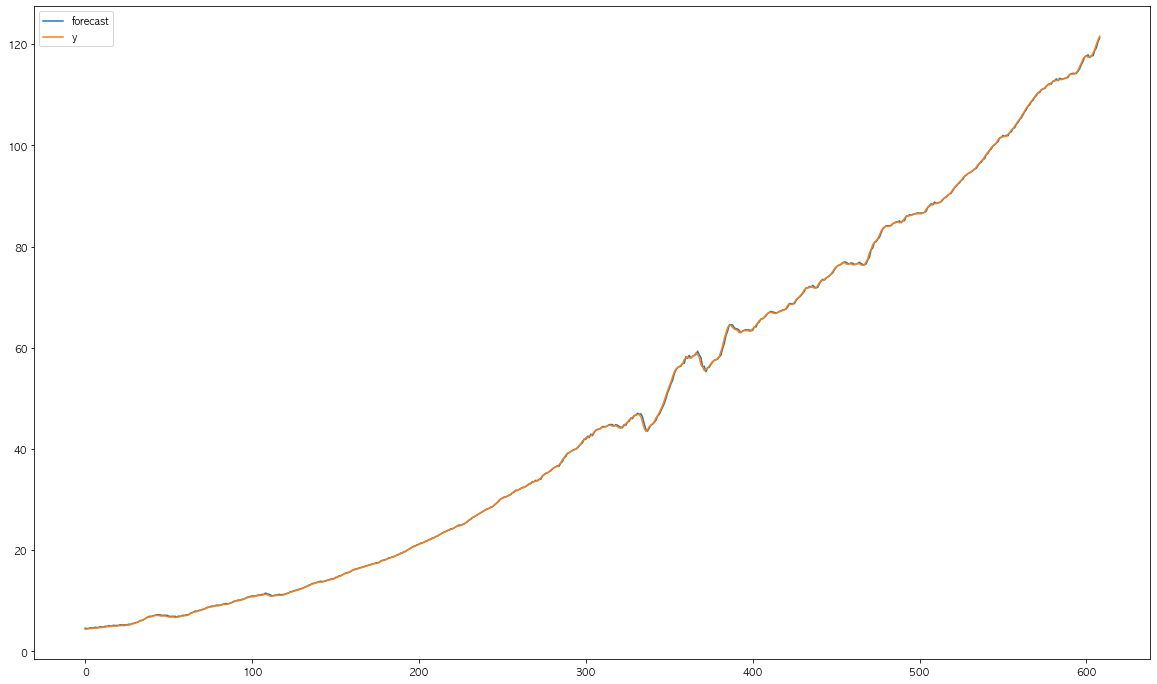

In [251]:
fig, ax = plt.subplots(figsize=(20, 12))
model_fit2.plot_predict(ax=ax)

plt.show()

In [252]:
fore = model_fit2.forecast(steps=5)
print(fore)

(array([121.94475995, 122.1373712 , 122.32998245, 122.5225937 ,
       122.71520495]), array([0.21570149, 0.38208324, 0.49542715, 0.58728914, 0.66661008]), array([[121.5219928 , 122.36752711],
       [121.38850182, 122.88624058],
       [121.35896307, 123.30100183],
       [121.37152814, 123.67365925],
       [121.4086732 , 124.02173669]]))


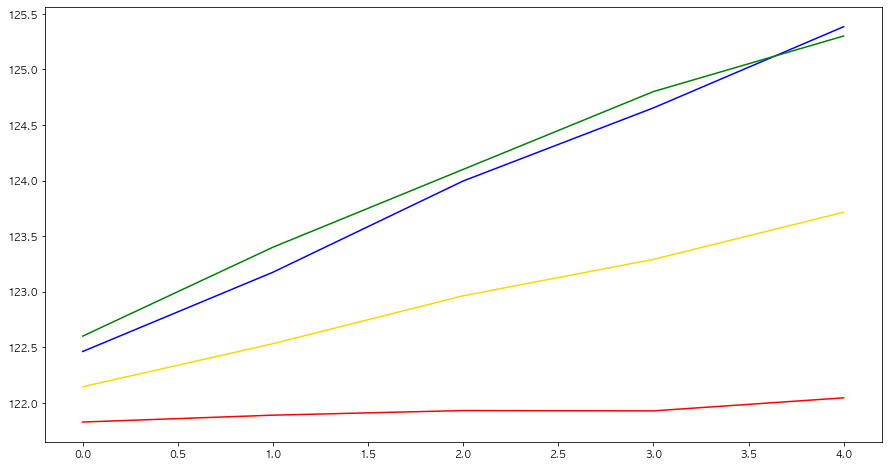

In [247]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
df_test = df_cei_t.copy()

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. 
test_y = df_test['선행종합지수(2015=100)'][-5:].values # 실제 5일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

    
plt.figure(figsize=(15,8))
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

# 국내건설수주액

In [47]:
df_const_amt = pd.read_csv('data/국내건설수주액.csv')
df_const_amt.head()

,Unnamed: 0,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
0,1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1,1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
2,1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
3,1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
4,1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


In [48]:
print(df_const_amt['Unnamed: 0'].dtype)

object


In [49]:
df_const_amt['Unnamed: 0'] = pd.to_datetime(df_const_amt['Unnamed: 0'])
df_const_amt.head()

,Unnamed: 0,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
0,1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1,1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
2,1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
3,1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
4,1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


In [50]:
print(df_const_amt['Unnamed: 0'].dtype)

datetime64[ns]


In [51]:
df_const_amt.set_index('Unnamed: 0', drop=True, inplace=True)
df_const_amt.head(3)

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN


In [58]:
df_const_amt.index.name = 'date'
df_const_amt.head()

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
date,,,,,,,,,,,,,,,,,,,,,
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,30.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,203.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


In [60]:
print(df_cei_t.index[0], df_cei_t.index[-1])
print(df_const_amt.index[0], df_const_amt.index[-1])

1970-01-01 00:00:00 2021-03-01 00:00:00
1976-01-01 00:00:00 2021-02-01 00:00:00
